In [1]:
#a
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.svm import SVC
df=pd.read_csv("music.csv")
X=df.drop(columns="Class")
encoder=LabelEncoder()
y_=df['Class']
y=encoder.fit_transform(y_)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)#important to standardize or else the model will take a long time to train(svm is sensitive to scale)

lsvm=SVC(kernel='linear')
lsvm.fit(X_train,y_train)
pred1=lsvm.predict(X_test)
pred1decoded=encoder.inverse_transform(pred1)
print(pred1decoded)

['sad' 'sad' 'relax' 'sad' 'relax' 'relax' 'angry' 'angry' 'sad' 'happy'
 'sad' 'angry' 'sad' 'relax' 'happy' 'relax' 'angry' 'angry' 'sad' 'sad'
 'angry' 'angry' 'angry' 'sad' 'relax' 'angry' 'happy' 'sad' 'angry'
 'happy' 'angry' 'happy' 'relax' 'relax' 'sad' 'relax' 'happy' 'angry'
 'happy' 'happy' 'angry' 'relax' 'relax' 'relax' 'sad' 'angry' 'happy'
 'happy' 'sad' 'happy' 'relax' 'angry' 'sad' 'relax' 'angry' 'relax' 'sad'
 'happy' 'angry' 'happy' 'happy' 'sad' 'happy' 'sad' 'happy' 'relax'
 'angry' 'sad' 'happy' 'relax' 'relax' 'happy' 'angry' 'relax' 'angry'
 'sad' 'happy' 'angry' 'happy' 'relax']


0.7375
0.7375
0.7375
0.7375


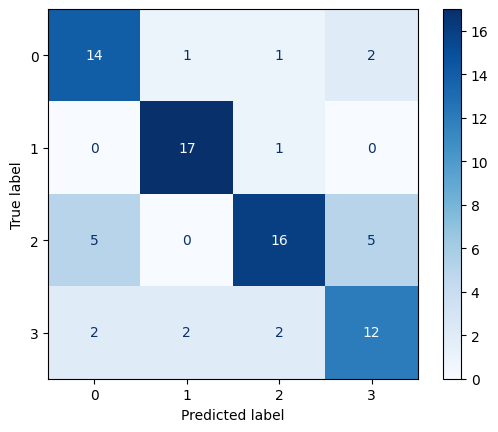

In [2]:
#b
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
acc=accuracy_score(y_test,pred1)
prec=precision_score(y_test,pred1,average='micro')
f1=f1_score(y_test,pred1,average='micro')
rec=recall_score(y_test,pred1,average='micro')
cm=confusion_matrix(y_test,pred1)
mat=ConfusionMatrixDisplay(cm)
mat.plot(cmap='Blues')

print(acc)
print(prec)
print(f1)
print(rec)

In [3]:
#c
from sklearn.preprocessing import MinMaxScaler
nscaler=MinMaxScaler()
X_train=nscaler.fit_transform(X_train)
X_test=nscaler.transform(X_test)

lsvm2=SVC(kernel='linear')
lsvm2.fit(X_train,y_train)
pred2=lsvm.predict(X_test)
acc2=accuracy_score(y_test,pred2)
print(acc2)
print("accuracy degraded as svm works better with standardized data instead of normalized one")

0.3625
accuracy degraded as svm works better with standardized data instead of normalized one


In [5]:
#d
X_train=nscaler.inverse_transform(X_train)
X_test=nscaler.inverse_transform(X_test)
nlsvm1=SVC(kernel="poly")
nlsvm1.fit(X_train,y_train)
pred3=nlsvm1.predict(X_test)
accnl1=accuracy_score(y_test,pred3)

nlsvm2=SVC(kernel="rbf")
nlsvm2.fit(X_train,y_train)
pred4=nlsvm2.predict(X_test)
accnl2=accuracy_score(y_test,pred4)

print("accuracy for non linear svm using poly kernel:",accnl1)
print("accuracy for non linear svm using rbf kernel:",accnl2)

accuracy for non linear svm using poly kernel: 0.65
accuracy for non linear svm using rbf kernel: 0.7375
